## Exploratory Data Analysis

In [98]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from collections import Counter




## Visulalisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows',500)

## Importing Dataset Titanic 

In [3]:
train = pd.read_csv('train.csv')
train.shape

(891, 12)

In [4]:
# Import Test Data

test = pd.read_csv("test.csv")
test.shape

(418, 11)

Identifying Data types 

In [6]:
#list of Columns along with their datatypes

train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

It has numerical and Categorical values.

Seperating Nmbericals and Categoricals values. 

In [7]:
for var in train.columns:
    print(var, train[var].unique()[0:20], '\n')

PassengerId [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 

Survived [0 1] 

Pclass [3 1 2] 

Name ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima'] 

Sex ['male' 'female'] 

Age [22. 38. 26. 35. nan 54.  2. 27. 14.  4. 58. 20. 39. 55. 31. 34. 15. 28.
  8. 19.] 

SibSp [1 0 3 4 2 5 8] 

Parch [0 1 2 5 3 4 6] 

Ticket ['A/5 21171' 'PC 1

There are three types of variable 
1) Categorical
2) Numerical
3) Mix 

In [8]:
# Let's make the list of variable

Discrete = [var for var in train.columns if train[var].dtype != 'O' and var!='Survived' and train[var].nunique()<10]
Continous = [var for var in train.columns if train[var].dtype != 'O' and var!='Survived' and var not in Discrete]
Mixed = ['Cabin']
Categorical = [var for var in train.columns if train[var].dtype == 'O' and var not in Mixed] 

In [9]:
#print(Discrete)
#print(Continous)
#print(Mixed)
#print(Categorical)

print('There are {} discrete variables ---- {}'.format(len(Discrete), Discrete))
print('There are {} continuous variables---- {}'.format(len(Continous), Continous))
print('There are {} categorical variables----{}'.format(len(Categorical), Categorical))
print('There are {} mixed variables----{}'.format(len(Mixed),Mixed))

There are 3 discrete variables ---- ['Pclass', 'SibSp', 'Parch']
There are 3 continuous variables---- ['PassengerId', 'Age', 'Fare']
There are 4 categorical variables----['Name', 'Sex', 'Ticket', 'Embarked']
There are 1 mixed variables----['Cabin']


NameError: name 'tips' is not defined

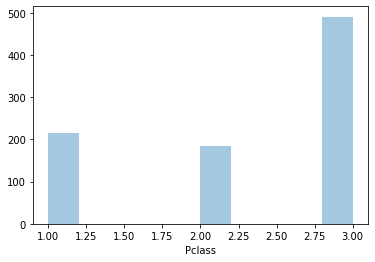

In [10]:
sns.distplot(train['Pclass'],kde=False)
#sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

Maximum Passanger purchased class 3 tickets. 

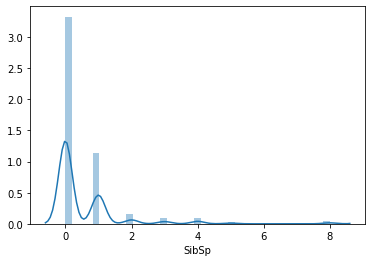

In [11]:
sns.distplot(train['SibSp'])


This digram indicates that most of the people are travelling alone as bar of 0 is higher

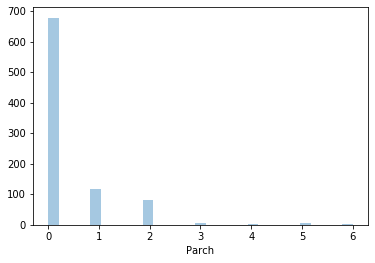

In [12]:
sns.distplot(train['Parch'],kde=False)

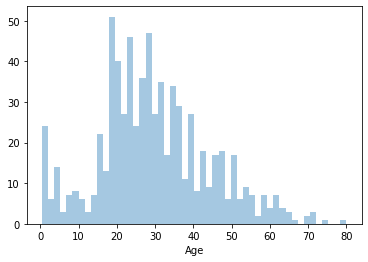

In [13]:
sns.distplot(train['Age'],kde=False, bins=50)

Most passanger are in the age range of 15 to 40, Age data is not normally distributed and it is slightly right skewed. 

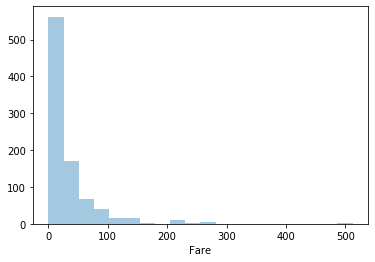

In [14]:
sns.distplot(train['Fare'],kde=False, bins =20)

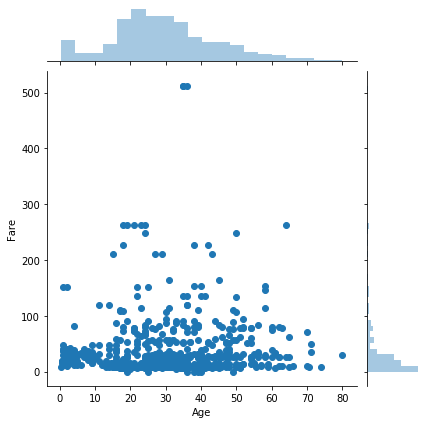

In [15]:
sns.jointplot(x='Age',y='Fare',data=train,kind='scatter')

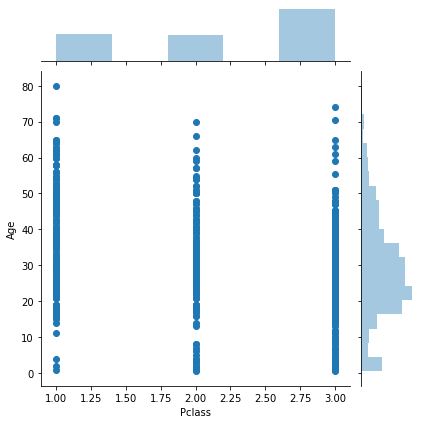

In [16]:
sns.jointplot(x='Pclass',y='Age',data=train,kind='scatter')

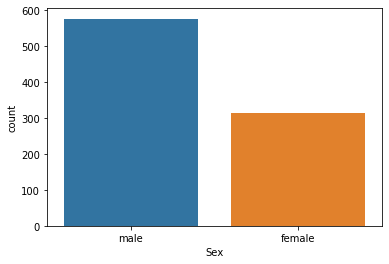

In [17]:
sns.countplot(x='Sex',data=train)

Number of Male Passanger is more than female passanger. 

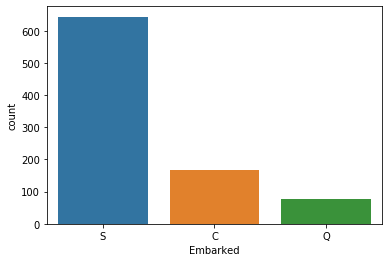

In [18]:
sns.countplot(x='Embarked',data=train)

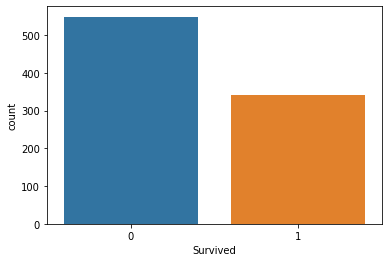

In [19]:
sns.countplot(x='Survived', data=train)


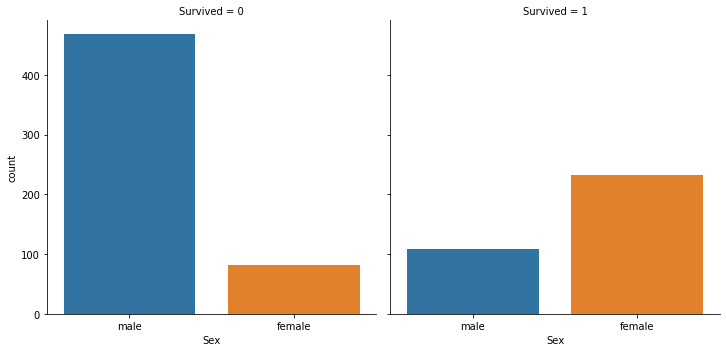

In [20]:
sns.catplot(x='Sex', col='Survived', kind='count', data=train)


Female survival is larger than Male

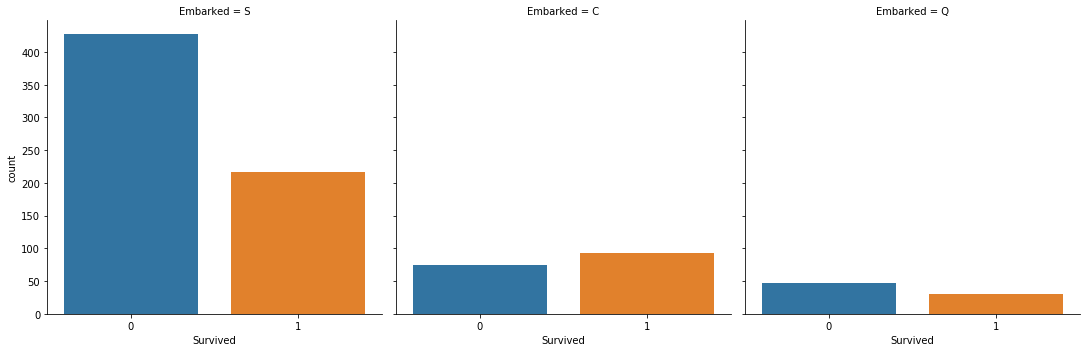

In [21]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=train);


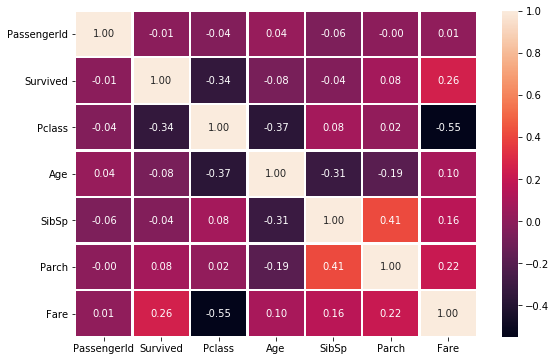

In [22]:
corr = train.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

### Detect columns with missing values - train data

In [23]:
train.isnull().mean()*100


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Missing Values are in "Age", "Cabin", "Embarked"

In [24]:
train[Categorical + Mixed].nunique()

Name        891
Sex           2
Ticket      681
Embarked      3
Cabin       147
dtype: int64

Cabin has High Cardinality 

In [26]:
train = train.drop(['Cabin'],axis = 1)


In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Outliers Detection

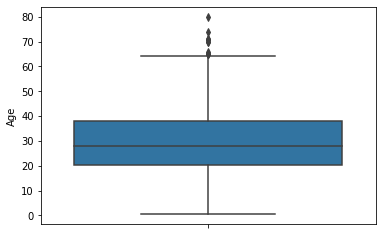

In [28]:
sns.boxplot(y='Age', data = train, whis=1.5)

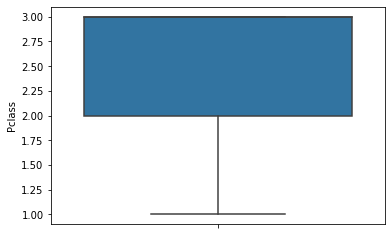

In [29]:
sns.boxplot(y='Pclass', data = train, whis=1.5)

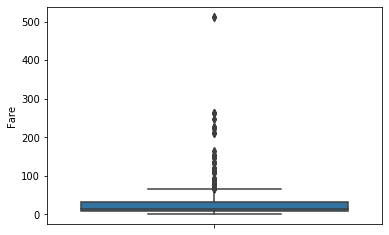

In [30]:
sns.boxplot(y='Fare', data = train, whis=1.5)

### Imputing Missing Data with Random Variable

In [37]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [44]:
train[train['Age'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,C


In [59]:
def Impute_na_randdom(data, variable):
    df = data.copy()

    # random sampling
    df[variable+'_random'] = df[variable]

    # extract the random sample to fill the na
    random_sample = data[variable].dropna().sample(
        df[variable].isnull().sum(), random_state=0)

    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

    return df[variable+'_random']
    
    

In [69]:
Impute_na_randdom(train,'Age')

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    15.0
889    26.0
890    32.0
Name: Age_random, Length: 891, dtype: float64

In [70]:
train['Age'] = Impute_na_randdom(train, 'Age')

In [71]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.00,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,C


In [78]:
train['Embarked'].value_counts().sort_values(ascending= False)


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [82]:
train['Embarked'].fillna('S',inplace=True)

In [83]:
train['Embarked'].isnull().sum()

0

In [84]:
train.isnull().mean()*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

## Categorical Encoding 

In [89]:
train = pd.get_dummies(train, columns=['Sex','Embarked'],drop_first=True)

In [90]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [91]:
train.drop(['PassengerId','Name','Ticket'],axis = 1 , inplace=True)

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [100]:
# separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    train.drop('Survived', axis=1),  # predictors
    train['Survived'],  # target
    test_size=0.1,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility



In [101]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Logistics Regression

In [102]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
pred_logreg = logreg.predict(X_test)
print(confusion_matrix(y_test, pred_logreg))
print(classification_report(y_test, pred_logreg))
print(accuracy_score(y_test, pred_logreg))

LogisticRegression()

[[43  8]
 [ 9 30]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83        51
           1       0.79      0.77      0.78        39

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90

0.8111111111111111


## Naive Bayes

In [103]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
pred_gnb = gnb.predict(X_test)
print(confusion_matrix(y_test, pred_gnb))
print(classification_report(y_test, pred_gnb))
print(accuracy_score(y_test, pred_gnb))

GaussianNB()

[[42  9]
 [10 29]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82        51
           1       0.76      0.74      0.75        39

    accuracy                           0.79        90
   macro avg       0.79      0.78      0.78        90
weighted avg       0.79      0.79      0.79        90

0.7888888888888889


## KNN - KNeighborsClassifier


In [105]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [106]:
pred_knn = knn.predict(X_test)
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))
print(accuracy_score(y_test, pred_knn))

[[43  8]
 [16 23]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        51
           1       0.74      0.59      0.66        39

    accuracy                           0.73        90
   macro avg       0.74      0.72      0.72        90
weighted avg       0.73      0.73      0.73        90

0.7333333333333333


## Decision Tree Classifier

In [107]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [108]:
pred_dtree = dtree.predict(X_test)
print(classification_report(y_test,pred_dtree))
print(accuracy_score(y_test, pred_dtree))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        51
           1       0.81      0.67      0.73        39

    accuracy                           0.79        90
   macro avg       0.79      0.77      0.78        90
weighted avg       0.79      0.79      0.79        90

0.7888888888888889


In [109]:
dtree_2 = DecisionTreeClassifier(max_features=7 , max_depth=6,  min_samples_split=8)
dtree_2.fit(X_train,y_train)
pred_dtree_2 = dtree_2.predict(X_test)
print(classification_report(y_test, pred_dtree_2))
print(accuracy_score(y_test, pred_dtree_2))


DecisionTreeClassifier(max_depth=6, max_features=7, min_samples_split=8)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        51
           1       0.84      0.69      0.76        39

    accuracy                           0.81        90
   macro avg       0.82      0.80      0.80        90
weighted avg       0.82      0.81      0.81        90

0.8111111111111111


## Random Forest Classifier

In [110]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6, max_features=7)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=7)

In [111]:
pred_rfc = rfc.predict(X_test)
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))
print(accuracy_score(y_test, pred_rfc))

[[49  2]
 [15 24]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.85        51
           1       0.92      0.62      0.74        39

    accuracy                           0.81        90
   macro avg       0.84      0.79      0.80        90
weighted avg       0.83      0.81      0.80        90

0.8111111111111111


## SVM Classifier

In [113]:
from sklearn.svm import SVC
svc = SVC(gamma = 0.01, C = 100)#, probability=True)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(confusion_matrix(y_test, pred_svc))
print(classification_report(y_test, pred_svc))
print(accuracy_score(y_test, pred_svc))

SVC(C=100, gamma=0.01)

[[40 11]
 [13 26]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        51
           1       0.70      0.67      0.68        39

    accuracy                           0.73        90
   macro avg       0.73      0.73      0.73        90
weighted avg       0.73      0.73      0.73        90

0.7333333333333333
